# FLIGHT DELAYS PREDICTION

## Contents
* [Problem Statement](#Problem-Statement)
* [Objectives](#Objectives)
* [Data Acquisition and Exploration](#Data-Acquisition-and-Exploration)
* [Data Preprocessing](#Data-Preprocessing) 
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Classification Modelling](#Classification-Modelling)

### Problem Statement
Flight delays have become a source of concern for airlines around the world, due to the financial losses incurred by both the aviation industry and passengers. Between 2012 and 2018, approximately 19% of major airline flights in the United States were delayed, affecting the travel of many passengers. These delays frequently lead to difficulties and dissatisfaction for passengers. The main goal is to develop an accurate technique for predicting flight delays that can predict with precision the potential and duration of delays for particular aircraft. 

Definition of <b>delayed flight</b>:

- Flight that arrives late at its destination
- If the flight has any delays from its departure, but still arrives to its destination on time, it will not be considered a delayed flight
- Flight that arrive on time is denoted as 0
- Flight that delayed is denoted as 1

### Objectives
- To identify attributes that affect flight delay
- To develop machine learning models that classify flights outcome (delayed or not delayed) with selected attributes 
- To evaluate performance of different machine learning models


### Data Acquisition and Exploration

In [1]:
# Import Required Libraries
%matplotlib inline
import datetime, warnings, scipy
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#### Import data

In [2]:
# 2018 airport data 
flight_data = pd.read_csv('2018.csv')
flight_data.head(2).append(flight_data.tail(2))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
7213445,2018-12-31,AA,1818,RDU,CLT,1435,1443.0,8.0,8.0,1451.0,1535.0,7.0,1546,1542.0,-4.0,0.0,NaN,0.0,71.0,59.0,44.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Dataset exploration

In [3]:
# Check dimension of dataset
flight_data.shape
print("There are "+ str(flight_data.shape[0]) +" rows and "+ str(flight_data.shape[1]) +" columns from the flight dataset.")

There are 7213446 rows and 28 columns from the flight dataset.


In [4]:
# Convert flight_data column to datetime format
flight_data['FL_DATE'] =  pd.to_datetime(flight_data['FL_DATE'], format='%Y-%m-%d')

In [5]:
# Check column type
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

#### Metadata

<b>FL_DATE</b> = Date of the Flight<br>
<b>OP_CARRIER</b> = Airline Identifier<br>
<b>OP_CARRIER_FL_NUM</b> = Flight Number<br>
<b>ORIGIN</b> = Starting Airport Code<br>
<b>DEST</b> = Destination Airport Code<br>
<b>CRS_DEP_TIME</b> = Planned Departure Time<br>
<b>DEP_TIME</b> = Actual Departure Time<br>
<b>DEP_DELAY</b> = Total Delay on Departure in minutes<br>
<b>TAXI_OUT</b> = The time duration elapsed between departure from the origin airport gate and wheels off<br>
<b>WHEELS_OFF</b> = The time point that the aircraft's wheels leave the ground<br>
<b>WHEELS_ON</b> = The time point that the aircraft'ss wheels touch on the ground<br>
<b>TAXI_IN</b> = The time duration elapsed between wheels-on and gate arrival at the destination airport<br>
<b>CRS_ARR_TIME</b> = Planned arrival time<br>
<b>ARR_TIME</b> = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL<br>
<b>ARR_DELAY</b> = Total Delay on Arrival in minutes<br>
<b>CANCELLED</b> = Flight Cancelled (1 = cancelled)<br>
<b>CANCELLATION_CODE</b> = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security<br>
<b>DIVERTED</b> = Aircraft landed on different airport that the one scheduled<br>
<b>CRS_ELAPSED_TIME</b> = Planned time amount needed for the flight trip<br>
<b>ACTUAL_ELAPSED_TIME</b> = AIR_TIME+TAXI_IN+TAXI_OUT<br>
<b>AIR_TIME</b> = The time duration between wheels_off and wheels_on time<br>
<b>DISTANCE</b> = Distance between two airports<br>
<b>CARRIER_DELAY</b> = Delay caused by the airline in minutes<br>
<b>WEATHER_DELAY</b> = Delay caused by weather<br>
<b>NAS_DELAY</b> = Delay caused by air system<br>
<b>SECURITY_DELAY</b> = caused by security reasons<br>
<b>LATE_AIRCRAFT_DELAY</b> = Delay caused by security<br>

### Data Preprocessing

#### Handle of missing data

In [6]:
# Calculate the proportion of missing data

def checkMissing(data,perc=0):
    """ 
    Takes in a dataframe and returns
    the percentage of missing value.
    """
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(flight_data)

Proportion of missing data in columns
            column_name  percentage
0           Unnamed: 27  100.000000
1     CANCELLATION_CODE   98.383796
2   LATE_AIRCRAFT_DELAY   81.247382
3         CARRIER_DELAY   81.247382
4         WEATHER_DELAY   81.247382
5             NAS_DELAY   81.247382
6        SECURITY_DELAY   81.247382
7             ARR_DELAY    1.899785
8   ACTUAL_ELAPSED_TIME    1.863769
9              AIR_TIME    1.863769
10            WHEELS_ON    1.653107
11              TAXI_IN    1.653107
12             ARR_TIME    1.653093
13            DEP_DELAY    1.625215
14             TAXI_OUT    1.605751
15           WHEELS_OFF    1.605737
16             DEP_TIME    1.557051
17     CRS_ELAPSED_TIME    0.000139


The following columns have been excluded from the dataframe due to containing more than 50% missing values: `Unnamed: 27`, `CANCELLATION_CODE`, `LATE_AIRCRAFT_DELAY`, `CARRIER_DELAY`, `WEATHER_DELAY`, `NAS_DELAY`, and `SECURITY_DELAY`. These columns do not contribute meaningful information to our analysis. Additionally, the `CANCELLED` column, indicating whether a flight was canceled, is deemed irrelevant for our objective of predicting flight delays, as a canceled flight never departs or arrives at its destination.

Further examination of the dataset revealed that `LATE_AIRCRAFT_DELAY`, `CARRIER_DELAY`, `WEATHER_DELAY`, `NAS_DELAY`, and `SECURITY_DELAY` represent the breakdown of delayed minutes for a flight. Consequently, missing values in these columns suggest that there was no delay for the corresponding instances. To address this, the missing data in these attributes has been imputed with zero.

In [7]:
#Fill the missing value 0
flight_data['LATE_AIRCRAFT_DELAY']=flight_data['LATE_AIRCRAFT_DELAY'].fillna(0)
flight_data['CARRIER_DELAY']=flight_data['CARRIER_DELAY'].fillna(0)
flight_data['WEATHER_DELAY']=flight_data['WEATHER_DELAY'].fillna(0)
flight_data['NAS_DELAY']=flight_data['NAS_DELAY'].fillna(0)
flight_data['SECURITY_DELAY']=flight_data['SECURITY_DELAY'].fillna(0)

#### Transformation of Duration time taken
Checking on the calculation for Departure Delay and Arrival Delay in minutes

In [8]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure

In [9]:
flight_data['DEP_TIME'] = flight_data['DEP_TIME'].apply(format_heure)
flight_data['CRS_DEP_TIME'] = flight_data['CRS_DEP_TIME'].apply(format_heure)

flight_data['ARR_TIME'] = flight_data['ARR_TIME'].apply(format_heure) 
flight_data['CRS_ARR_TIME'] = flight_data['CRS_ARR_TIME'].apply(format_heure)

flight_data['WHEELS_OFF'] = flight_data['WHEELS_OFF'].apply(format_heure)
flight_data['WHEELS_ON'] = flight_data['WHEELS_ON'].apply(format_heure)

Obtain duration of time taken for:
- Flight take off and wheels off
- Flight on land and wheels on

In [10]:
# Convert flight_data column to datetime format

def time_difference(actual,plan):
    actual_time = pd.to_timedelta(actual.astype(str)) 
    plan_time = pd.to_timedelta(plan.astype(str))
    return actual_time.sub(plan_time).dt.total_seconds().div(60)

flight_data['WHEELS_OFF_elapse'] =  time_difference(flight_data['WHEELS_OFF'],flight_data['DEP_TIME'])
flight_data['WHEELS_ON_elapse'] =  time_difference(flight_data['ARR_TIME'] ,flight_data['WHEELS_ON'])

# Remove incorrect record
flight_data=flight_data[flight_data['WHEELS_OFF_elapse']>0]
flight_data=flight_data[flight_data['WHEELS_ON_elapse']>0]

In [11]:
# Check first 2 instances and last 2 instances
flight_data.head(2).append(flight_data.tail(2))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,WHEELS_OFF_elapse,WHEELS_ON_elapse
0,2018-01-01,UA,2429,EWR,DEN,15:17:00,15:12:00,-5.0,15.0,15:27:00,17:12:00,10.0,17:45:00,17:22:00,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,10.0
1,2018-01-01,UA,2427,LAS,SFO,11:15:00,11:07:00,-8.0,11.0,11:18:00,12:23:00,7.0,12:54:00,12:30:00,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,NaN,11.0,7.0
7213444,2018-12-31,AA,1818,CLT,RDU,13:00:00,13:23:00,23.0,11.0,13:34:00,14:00:00,4.0,13:50:00,14:04:00,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,0.0,0.0,0.0,0.0,0.0,NaN,11.0,4.0
7213445,2018-12-31,AA,1818,RDU,CLT,14:35:00,14:43:00,8.0,8.0,14:51:00,15:35:00,7.0,15:46:00,15:42:00,-4.0,0.0,NaN,0.0,71.0,59.0,44.0,130.0,0.0,0.0,0.0,0.0,0.0,NaN,8.0,7.0


In [16]:
# Drop the unused columns 
flight_data.drop(['Unnamed: 27', 
                  'CANCELLATION_CODE',
                  'CANCELLED',
                  'OP_CARRIER_FL_NUM',
                  'CRS_DEP_TIME',
                  'DEP_TIME',
                  'CRS_ARR_TIME',
                  'ARR_TIME',
                  'WHEELS_ON',
                  'WHEELS_OFF'
                 ],
                 axis = 1, inplace = True)

In [17]:
#Check number of missing values
flight_data.isna().sum()

FL_DATE                    0
OP_CARRIER                 0
ORIGIN                     0
DEST                       0
DEP_DELAY               4735
TAXI_OUT                   0
TAXI_IN                    0
ARR_DELAY              17560
DIVERTED                   0
CRS_ELAPSED_TIME           7
ACTUAL_ELAPSED_TIME    14962
AIR_TIME               14962
DISTANCE                   0
CARRIER_DELAY              0
WEATHER_DELAY              0
NAS_DELAY                  0
SECURITY_DELAY             0
LATE_AIRCRAFT_DELAY        0
WHEELS_OFF_elapse          0
WHEELS_ON_elapse           0
dtype: int64

In [18]:
flight_data = flight_data.dropna()

In [19]:
#Check number of missing values
flight_data.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
DEP_DELAY              0
TAXI_OUT               0
TAXI_IN                0
ARR_DELAY              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
WHEELS_OFF_elapse      0
WHEELS_ON_elapse       0
dtype: int64

#### Rename of OP_CARRIER
The column labeled `OP_CARRIER`, which originally contains airline identifiers in their abbreviated form, has undergone a renaming process for improved clarity. The abbreviations have been replaced with the extended names of the respective airlines. The primary source for obtaining these extended names is the information available on [Wikipedia's list of airlines in the United States](https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States).

In [20]:
# Check the instances for OP_CARRIER
flight_data.OP_CARRIER.unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [21]:
flight_data['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [22]:
flight_data.OP_CARRIER.nunique()

18

In [23]:
flight_data.OP_CARRIER.value_counts()

Southwest Airlines    1326376
Delta Airlines         938464
American Airlines      892021
SkyWest Airlines       758717
United Airlines        609226
Republic Airways       303927
JetBlue Airways        293075
Envoy Air              283788
PSA Airlines           264929
Alaska Airlines        240352
Endeavor Air           231211
Mesa Airline           208382
ExpressJet             196072
Spirit Airlines        171359
Frontier Airlines      116058
Allegiant Air           94982
Hawaiian Airlines       83161
Virgin America          17012
Name: OP_CARRIER, dtype: int64

#### Data reduction: Focus on Busy Airports
While extensive pre-processing and cleaning were conducted in a separate notebook, the focus of this current task is to generate a final dataframe specifically tailored for modeling. The dataset will be narrowed down to include only the top 20 cities. This approach is chosen because the `DEST` feature, representing the destination, is a categorical column with 358 distinct values. To simplify the modeling process, hot encoding will be applied to these top 20 destinations instead of the entire set of 358.

In [24]:
flight_data.DEST.value_counts().iloc[:20]

ATL    384813
ORD    322119
DFW    271096
DEN    232583
CLT    225450
LAX    217452
SFO    171824
PHX    171433
IAH    170255
LGA    162095
LAS    158721
MSP    156532
DTW    154229
BOS    142239
SEA    137829
EWR    137238
MCO    135272
DCA    127517
JFK    122315
PHL    112410
Name: DEST, dtype: int64

In [25]:
top_cities = flight_data.DEST.value_counts().iloc[0:1].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,ATL,384813


In [26]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

# Creating a list with top cities only:
city_list = top_cities['DEST'].tolist()

In [27]:
boolean_series =  flight_data.DEST.isin(city_list)
flight_data =  flight_data[boolean_series]
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse
13,2018-01-01,United Airlines,EWR,ATL,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0
241,2018-01-01,United Airlines,EWR,ATL,20.0,13.0,9.0,12.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0
349,2018-01-01,United Airlines,EWR,ATL,0.0,14.0,5.0,-17.0,0.0,154.0,137.0,118.0,746.0,0.0,0.0,0.0,0.0,0.0,14.0,5.0
517,2018-01-01,United Airlines,IAH,ATL,201.0,12.0,7.0,184.0,0.0,121.0,104.0,85.0,689.0,0.0,0.0,132.0,0.0,52.0,12.0,7.0
686,2018-01-01,United Airlines,EWR,ATL,9.0,26.0,5.0,5.0,0.0,154.0,150.0,119.0,746.0,0.0,0.0,0.0,0.0,0.0,26.0,5.0


In [28]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384813 entries, 13 to 7213438
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FL_DATE              384813 non-null  datetime64[ns]
 1   OP_CARRIER           384813 non-null  object        
 2   ORIGIN               384813 non-null  object        
 3   DEST                 384813 non-null  object        
 4   DEP_DELAY            384813 non-null  float64       
 5   TAXI_OUT             384813 non-null  float64       
 6   TAXI_IN              384813 non-null  float64       
 7   ARR_DELAY            384813 non-null  float64       
 8   DIVERTED             384813 non-null  float64       
 9   CRS_ELAPSED_TIME     384813 non-null  float64       
 10  ACTUAL_ELAPSED_TIME  384813 non-null  float64       
 11  AIR_TIME             384813 non-null  float64       
 12  DISTANCE             384813 non-null  float64       
 13  CARRIER_DELA

#### Transformation for Date

In [29]:
import calendar
flight_date=pd.DatetimeIndex(flight_data['FL_DATE'])

flight_data['DAY'] = flight_date.day
flight_data['MONTH'] = flight_date.month
flight_data['MONTH_AB'] = flight_data['MONTH'].apply(lambda x: calendar.month_abbr[x])
flight_data['DAYOFWEEK'] = flight_date.dayofweek
flight_data['DAYNAME'] = flight_data['DAYOFWEEK'].apply(lambda x: calendar.day_name[x])

daytype = []
for value in flight_data['DAYOFWEEK']:
    if value in (0,1,2,3,4):
        daytype.append(1) #weekday
    else:
        daytype.append(0) #weekend
flight_data['WEEKDAY'] = daytype
flight_data.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
13,2018-01-01,United Airlines,EWR,ATL,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1,1,Jan,0,Monday,1
241,2018-01-01,United Airlines,EWR,ATL,20.0,13.0,9.0,12.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0,1,1,Jan,0,Monday,1


In [30]:
# For checking
print('Maximum number of days in a month:', flight_data.DAY.nunique())
print('Total number of months:', flight_data.MONTH.nunique())
print('Total number of days per week:', flight_data.DAYNAME.nunique())

print()

print('Months present in dataframe:',flight_data.MONTH.unique())
print('Months present in dataframe:', flight_data.MONTH_AB.unique())

print()
print('Days present in dataframe:', flight_data['DAYOFWEEK'].unique())
print('Days present in dataframe:', flight_data.DAYNAME.unique())

Maximum number of days in a month: 31
Total number of months: 12
Total number of days per week: 7

Months present in dataframe: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months present in dataframe: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']

Days present in dataframe: [0 1 2 3 4 5 6]
Days present in dataframe: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']


#### Rename of Airports and city name

We plan to convert the IATA airport codes in the origin and destination columns into actual city names, enabling more detailed flight analysis on a per-city basis as part of the Exploratory Data Analysis (EDA). To achieve this, We've identified a file named "airports" from 2015. It's important to note that this file might be incomplete, so We'll need to examine its contents and strategize on how to enhance its data for my analysis. The initial step involves loading the file and exploring its contents to better understand its structure and potential for completion.

Columns `ORIGIN` and `DEST` are made up of the IATA airports codes to display the origin and destination. Cleaning of the columns are required to obtain the city name for further flight analysis by destination.
For this purpose we found a file called airports from 2015.

In [31]:
airports = pd.read_csv('airports.csv')
airports.head(10)

,IATA_CODE,AIRPORT,CITY
0,AZA,Phoenix-Mesa Gateway Airport,NaN
1,BKG,Branson Airport,NaN
2,ABE,Lehigh Valley International Airport,Allentown
3,ABI,Abilene Regional Airport,Abilene
4,ABQ,Albuquerque International Sunport,Albuquerque
5,ABR,Aberdeen Regional Airport,Aberdeen
6,ABY,Southwest Georgia Regional Airport,Albany
7,ACK,Nantucket Memorial Airport,Nantucket
8,ACT,Waco Regional Airport,Waco
9,ACV,Arcata Airport,Arcata/Eureka


In [32]:
# Check dimension of dataset
airports.shape
print("There are "+ str(airports.shape[0]) +" rows and "+ str(airports.shape[1]) +" columns from the airport dataset.")

There are 353 rows and 3 columns from the airport dataset.


In [33]:
print("There are "+str(len(airports.IATA_CODE.unique()))+" records")

There are 353 records


In [34]:
# Covert to list
airport_IATA_CODE = list(airports['IATA_CODE'])

In [35]:
flight_data.ORIGIN.unique()

array(['EWR', 'IAH', 'SFO', 'ORD', 'SEA', 'FSD', 'DSM', 'ILM', 'JAN',
       'OAJ', 'TLH', 'CHS', 'CID', 'BMI', 'ABY', 'DHN', 'MDT', 'FSM',
       'HSV', 'TYS', 'BQK', 'CHA', 'GSP', 'AGS', 'MOB', 'MGM', 'TRI',
       'GSO', 'AVL', 'CSG', 'VLD', 'PIA', 'LFT', 'GNV', 'FAY', 'BTV',
       'AEX', 'FAR', 'EWN', 'CAE', 'BOS', 'MYR', 'BTR', 'TUL', 'ECP',
       'LEX', 'ELM', 'VPS', 'PHF', 'RST', 'CRW', 'SDF', 'XNA', 'LNK',
       'HPN', 'BHM', 'GRK', 'EYW', 'SGF', 'GPT', 'ABE', 'MLI', 'EVV',
       'DEN', 'MCO', 'AUS', 'MIA', 'LGA', 'SLC', 'BWI', 'DTW', 'FLL',
       'LAS', 'PHL', 'DFW', 'CLE', 'LAX', 'MSY', 'MSP', 'TPA', 'CLT',
       'FWA', 'SHV', 'ASE', 'SBN', 'MLU', 'GTR', 'ROA', 'CMH', 'DAL',
       'DCA', 'HOU', 'IAD', 'IND', 'JAX', 'MCI', 'MDW', 'MKE', 'OAK',
       'PBI', 'PHX', 'PIT', 'RDU', 'RIC', 'RSW', 'SAN', 'SAT', 'STL',
       'JFK', 'STT', 'DAB', 'SJU', 'OMA', 'CAK', 'STX', 'PDX', 'BDL',
       'HNL', 'ELP', 'CVG', 'GRR', 'FNT', 'MEM', 'SJC', 'BNA', 'ORF',
       'OKC', 'BUF',

In [36]:
# Get the list of origin and destination from `flight_data` 
flight_ORIGIN = flight_data.ORIGIN.unique().tolist()
flight_DEST = flight_data.DEST.unique().tolist()

# Check type
print("Type:")
print(type(flight_ORIGIN))
print(type(flight_DEST))
print()
print("Length:")
print("Origin: "+str(len(flight_ORIGIN)))
print("Destination: "+str(len(flight_DEST)))

Type:
<class 'list'>
<class 'list'>

Length:
Origin: 167
Destination: 1


#### Between flight_ORIGIN and airport_IATA_CODE

In [37]:
difference = [item for item in flight_ORIGIN if item not in airport_IATA_CODE]
print("IATA Code (Origin) that is not found from the airport data:")
print(difference)
print()
print("There are "+str(len(difference)))

IATA Code (Origin) that is not found from the airport data:
[]

There are 0


#### Between flight_DEST and airport_IATA_CODE

In [38]:
difference_2 = [item for item in flight_DEST if item not in airport_IATA_CODE]
print("IATA Code (Destination) that is not found from airport data:")
print(difference_2)
print()

IATA Code (Destination) that is not found from airport data:
[]



The next step if to save this dataframe as a .csv file and to open it in Excel where we will add the necessary columns to make it match with the airports dataframe. These columns are:

* Airport Name<br>
* City Name<br>

In [39]:
# Creating a dictionary and looking at its type.
airport_dict = pd.Series(airports.AIRPORT.values, index=airports.IATA_CODE).to_dict()
print(type(airport_dict))

<class 'dict'>


In [40]:
flight_data['ORIGIN'].replace(airport_dict, inplace=True)
flight_data['DEST'].replace(airport_dict, inplace=True)
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
13,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1,1,Jan,0,Monday,1
241,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,20.0,13.0,9.0,12.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0,1,1,Jan,0,Monday,1
349,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,0.0,14.0,5.0,-17.0,0.0,154.0,137.0,118.0,746.0,0.0,0.0,0.0,0.0,0.0,14.0,5.0,1,1,Jan,0,Monday,1
517,2018-01-01,United Airlines,George Bush Intercontinental Airport,Hartsfield-Jackson Atlanta International Airport,201.0,12.0,7.0,184.0,0.0,121.0,104.0,85.0,689.0,0.0,0.0,132.0,0.0,52.0,12.0,7.0,1,1,Jan,0,Monday,1
686,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,9.0,26.0,5.0,5.0,0.0,154.0,150.0,119.0,746.0,0.0,0.0,0.0,0.0,0.0,26.0,5.0,1,1,Jan,0,Monday,1


#### Transformation of Target attribute: Flight status
`FLIGHT_STATUS` is the outcome of the flight whether it arrives destination on time or it is delayed, thus the responses is binary where 0 is for flights that arrive earlier or on time and 1 is for flights that are delayed. 

In [41]:
status = []

for value in flight_data['ARR_DELAY']:
    if value <= 15:
        status.append(0)
    else:
        status.append(1)
flight_data['FLIGHT_STATUS'] = status    

### Exploratory Data Analysis 

In [42]:
flight_category = flight_data.select_dtypes(include=['object','category'])
flight_numerical = flight_data.select_dtypes(exclude=['object'])

[Text(0.5, 0, 'Number of counts')]

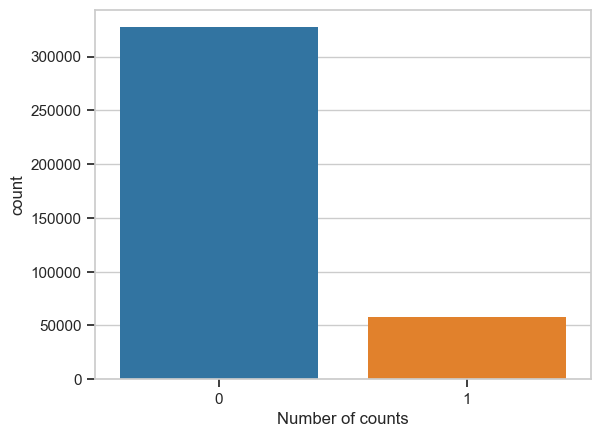

In [43]:
# Output Barplot showing the occurence of flight outcome

sns.set_context("notebook")
g=sns.countplot(x="FLIGHT_STATUS",data=flight_data)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

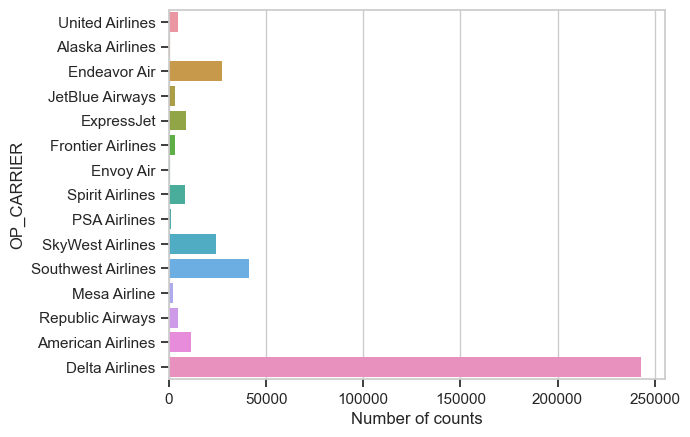

In [44]:
# Output Barplot showing the occurence of each categorical features         

sns.set_context("notebook")
g=sns.countplot(y="OP_CARRIER",data=flight_category)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

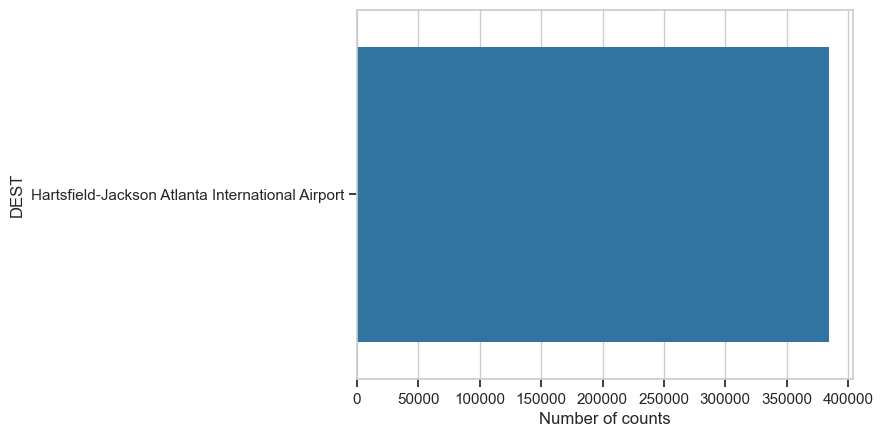

In [45]:
# Output Barplot showing the occurence of each categorical features         
sns.set_context("notebook")
g=sns.countplot(y="DEST",data=flight_category)
g.set(xlabel="Number of counts")

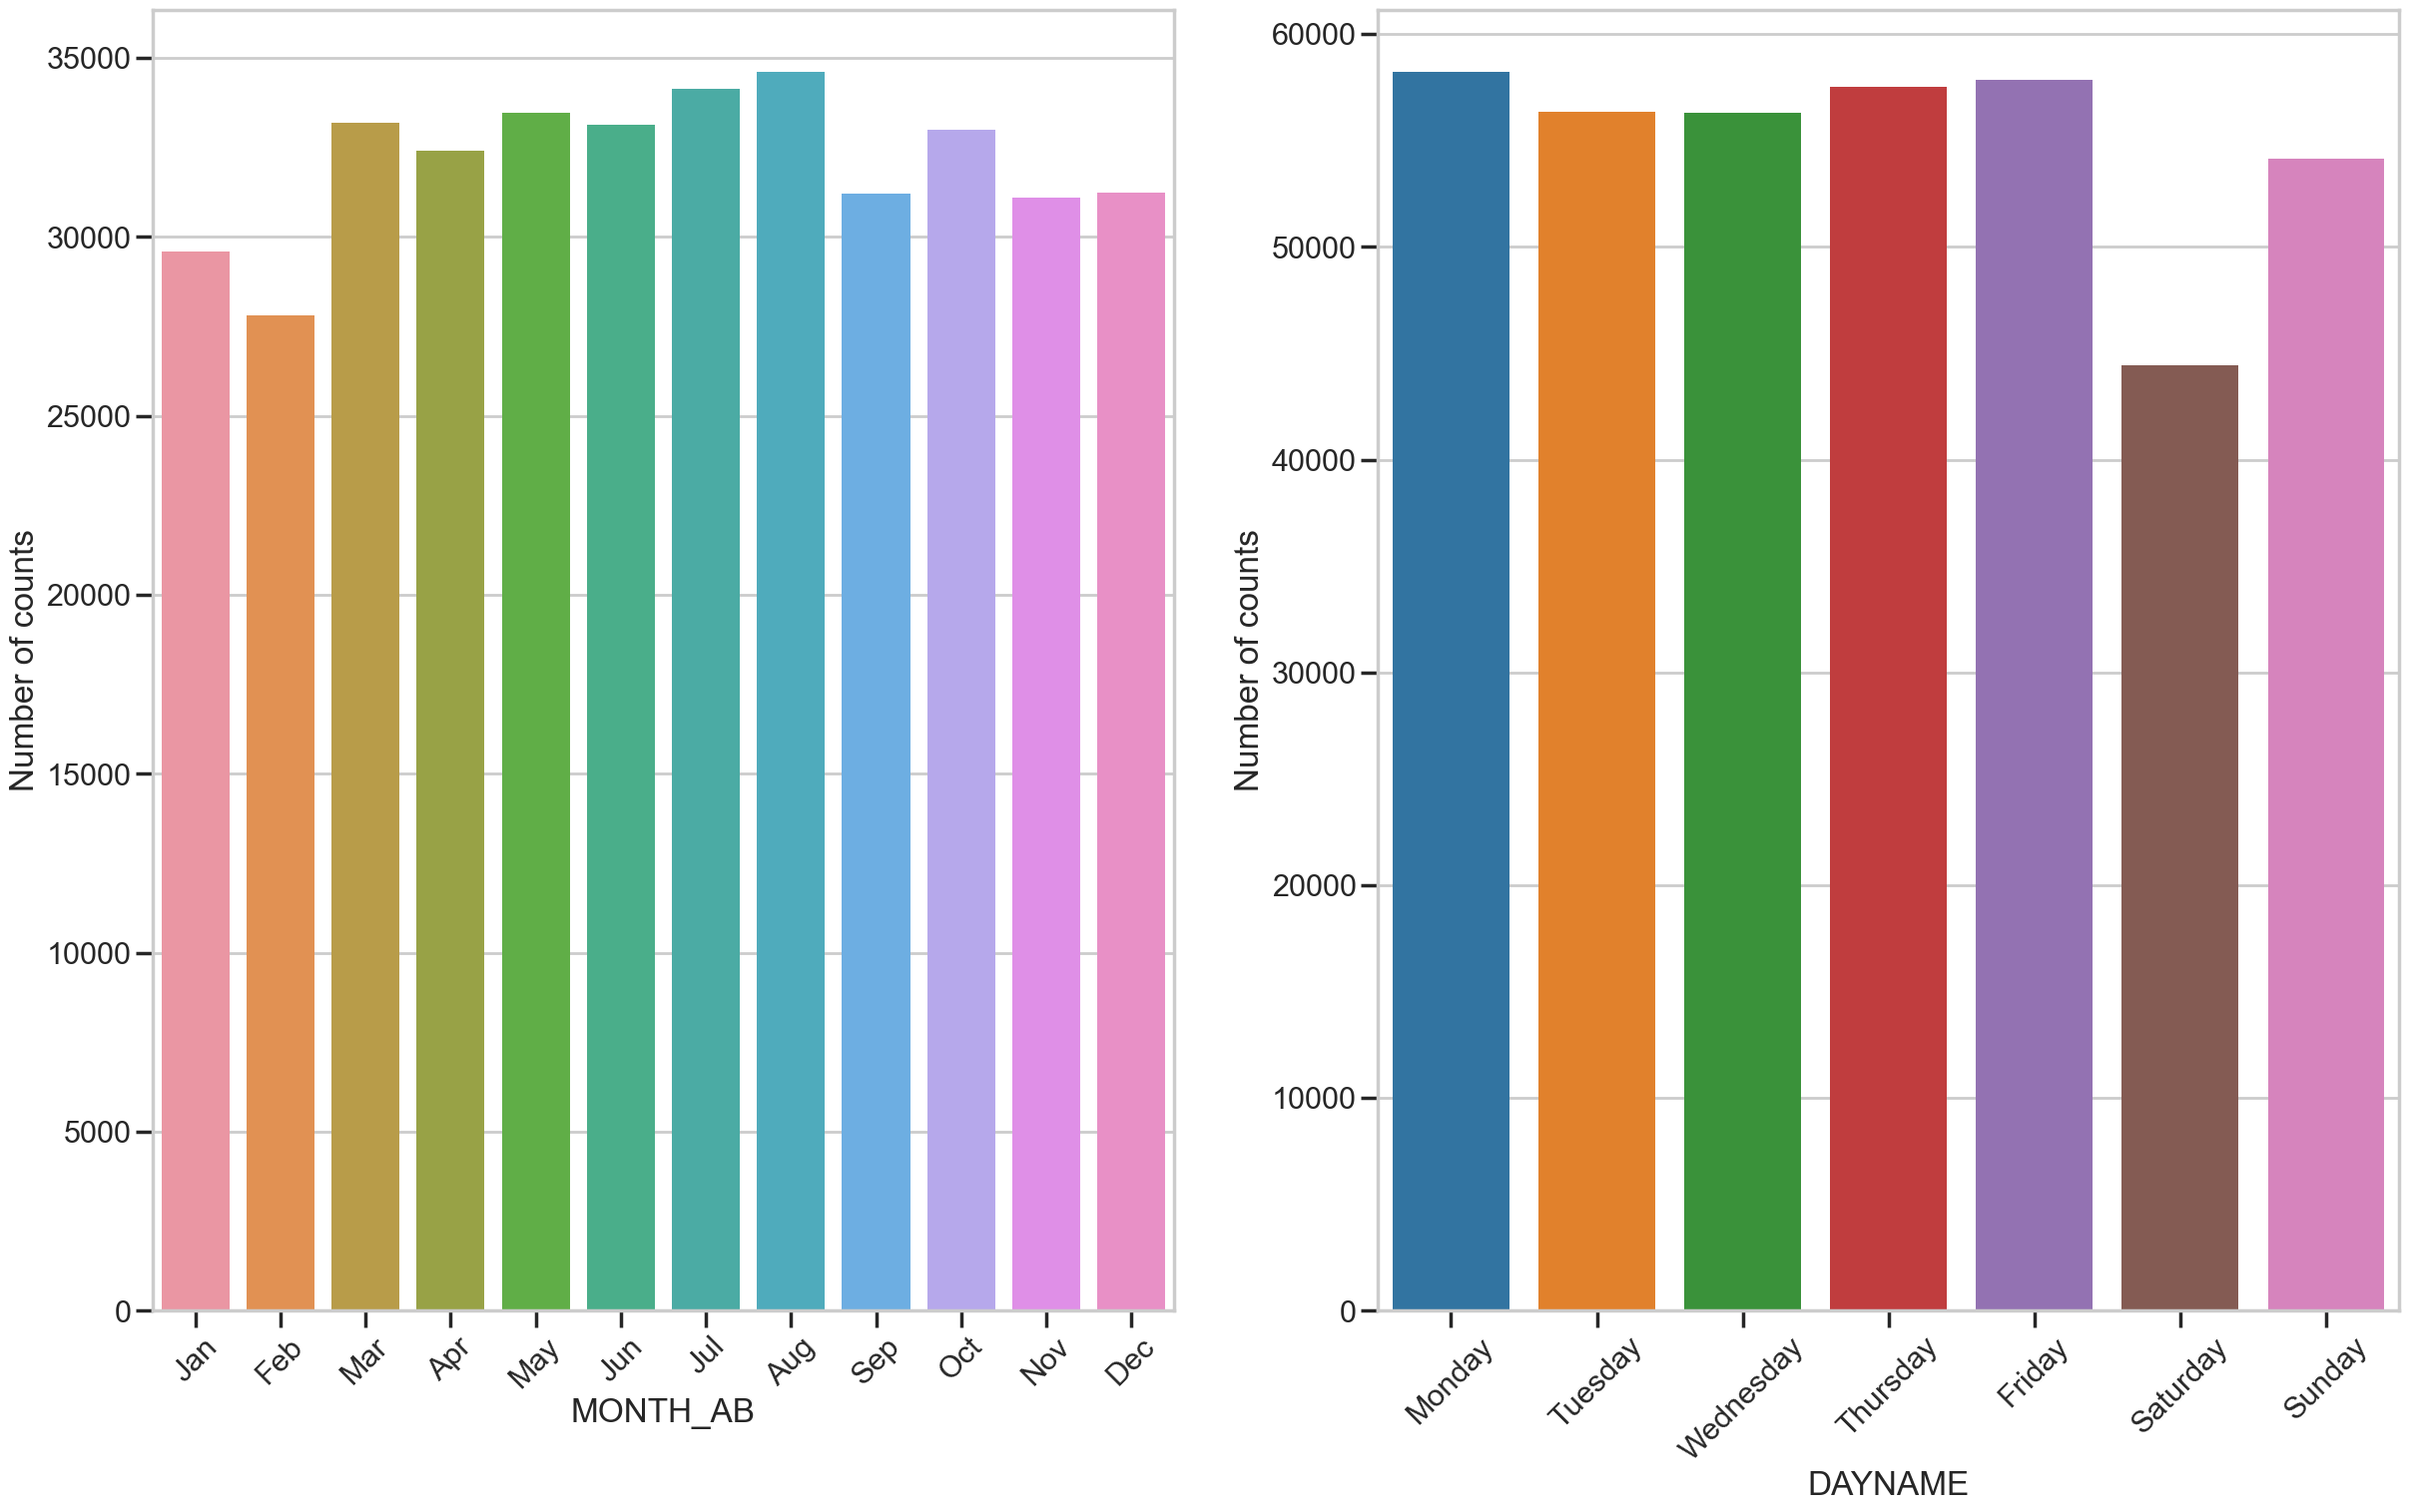

In [46]:
# Finding categorical features
category = []
for i in flight_category:
    if i in ["ORIGIN","DEST","OP_CARRIER","FLIGHT_STATUS"]:
        pass
    else:
        category.append(i)
        
# Output Barplot showing the occurence of each categorical features         
fig, ax = plt.subplots(ncols=2, figsize=(12,12))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2.5)
sns.color_palette("husl", 8)
sns.set_context("poster")

#ncols=2,nrows=round(len(list(category))/2)

for i, feature in enumerate(list(flight_category[category]), 1):
    plt.subplot(len(list(category)), 2, i)
    g=sns.countplot(x=feature,data=flight_category)
    g.set(ylabel="Number of counts")
    plt.xticks(rotation=45)
   
plt.show()

### Classification Modelling

#### Data Preparation
- Encoding
- Feature Selection


#### One hot encoding for categorical attributes

We transformed certain categorical variables into numeric representations using the one-hot encoding method. This technique involves creating a dummy variable for each distinct category in the original categorical variable. When a specific category is present, the corresponding dummy variable is assigned a value of 1; otherwise, it is set to 0.

In [47]:
Carrier = pd.get_dummies(flight_data['OP_CARRIER'],prefix="OP_CARRIER",drop_first=False)
month= pd.get_dummies(flight_data['MONTH_AB'],prefix="MONTH",drop_first=False)
day= pd.get_dummies(flight_data['DAYNAME'],prefix="DAY",drop_first=False)
flight_data_new=pd.concat([flight_data,Carrier,month,day],axis=1)

In [48]:
flight_data_new.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS,OP_CARRIER_Alaska Airlines,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
13,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1,1,Jan,0,Monday,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
241,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,20.0,13.0,9.0,12.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0,1,1,Jan,0,Monday,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Feature selection

#### Drop redundant columns

In [49]:
# Drop the redundant columns 

flight_data_new.drop(['FL_DATE', 
                      'OP_CARRIER',
                      'ORIGIN',
                      'DEST',
                      'DAYOFWEEK',
                      'MONTH',
                      'MONTH_AB',
                      'DAY',
                      'DAYNAME',
                      'WEEKDAY',
                      'ARR_DELAY',
                      'CARRIER_DELAY',
                      'WEATHER_DELAY',
                      'NAS_DELAY',
                      'SECURITY_DELAY',
                      'LATE_AIRCRAFT_DELAY'
                 ],
                 axis = 1, inplace = True)

In [50]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384813 entries, 13 to 7213438
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DEP_DELAY                      384813 non-null  float64
 1   TAXI_OUT                       384813 non-null  float64
 2   TAXI_IN                        384813 non-null  float64
 3   DIVERTED                       384813 non-null  float64
 4   CRS_ELAPSED_TIME               384813 non-null  float64
 5   ACTUAL_ELAPSED_TIME            384813 non-null  float64
 6   AIR_TIME                       384813 non-null  float64
 7   DISTANCE                       384813 non-null  float64
 8   WHEELS_OFF_elapse              384813 non-null  float64
 9   WHEELS_ON_elapse               384813 non-null  float64
 10  FLIGHT_STATUS                  384813 non-null  int64  
 11  OP_CARRIER_Alaska Airlines     384813 non-null  uint8  
 12  OP_CARRIER_American Airlines

#### Drop constant variable

In [51]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [52]:
# separate train and test (again, as we transformed the previous ones)

X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((307850, 44), (76963, 44))

In [53]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train)

DropConstantFeatures()

In [54]:
# number of quasi-constant features

len(sel.features_to_drop_)

1

In [55]:
sel.features_to_drop_

['DIVERTED']

`DIVERTED` is a constant features with only one kind of response for all instances. This does not give any information to the model, hence we will drop it.

In [56]:
# Drop the redundant columns 
flight_data_new.drop(['DIVERTED'], axis = 1, inplace = True)

In [57]:
#remove the constant features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((307850, 43), (76963, 43))

#### Remove multicollinearity effect (Positive)

In [58]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [59]:
corrmat

,feature1,feature2,corr
0,AIR_TIME,CRS_ELAPSED_TIME,0.983980
1,CRS_ELAPSED_TIME,AIR_TIME,0.983980
2,DISTANCE,AIR_TIME,0.982961
3,AIR_TIME,DISTANCE,0.982961
4,DISTANCE,CRS_ELAPSED_TIME,0.981390
5,CRS_ELAPSED_TIME,DISTANCE,0.981390
6,AIR_TIME,ACTUAL_ELAPSED_TIME,0.978437
7,ACTUAL_ELAPSED_TIME,AIR_TIME,0.978437
8,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,0.968000
9,ACTUAL_ELAPSED_TIME,CRS_ELAPSED_TIME,0.968000


In [60]:
corrmat.feature1.unique()

array(['AIR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', 'ACTUAL_ELAPSED_TIME'],
      dtype=object)

In [61]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 1 correlated groups
out of 43 total features


In [62]:
for group in correlated_groups:
    print(group)
    print()

   feature1             feature2      corr
0  AIR_TIME     CRS_ELAPSED_TIME  0.983980
3  AIR_TIME             DISTANCE  0.982961
6  AIR_TIME  ACTUAL_ELAPSED_TIME  0.978437



In [63]:
group = correlated_groups[0]
group

,feature1,feature2,corr
0,AIR_TIME,CRS_ELAPSED_TIME,0.983980
3,AIR_TIME,DISTANCE,0.982961
6,AIR_TIME,ACTUAL_ELAPSED_TIME,0.978437


In [64]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['CRS_ELAPSED_TIME']

# train a random forest 
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [65]:
importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,ACTUAL_ELAPSED_TIME,0.522288
3,CRS_ELAPSED_TIME,0.229596
0,CRS_ELAPSED_TIME,0.162209
1,DISTANCE,0.085907


`ACTUAL_ELAPSED_TIME`,`CRS_ELAPSED_TIME`,`AIR_TIME` are highly correlated to each other as they are transformed from the same attributes. Thus, we keep `ACTUAL_ELAPSED_TIME` as it gives the greatest importance as compared to other attributes. 

In [67]:
# Drop the redundant columns 
flight_data_new.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

#### Remove multicollinearity effect (Negative)

In [68]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() 
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat <= -0.8]
corrmat = corrmat[corrmat > -1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [69]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 43 total features


#### Importance by Random Forest

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((307850, 41), (76963, 41))

In [71]:
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)
rf.feature_importances_

array([5.75290753e-01, 1.48949515e-01, 2.45394573e-02, 2.13851133e-02,
       1.22917546e-02, 1.65083824e-01, 3.40303778e-02, 2.04047761e-05,
       2.79002051e-04, 7.52589715e-03, 3.39976210e-04, 2.68026509e-05,
       2.90750215e-05, 7.83557561e-04, 3.04235484e-04, 3.31050067e-06,
       4.29584753e-05, 8.55263404e-05, 1.16527416e-03, 6.78598925e-04,
       8.59623158e-05, 1.02240298e-05, 9.84306572e-05, 2.19115828e-05,
       2.86346738e-04, 1.62219328e-04, 2.06463555e-04, 1.81809576e-04,
       1.83061410e-03, 1.68967157e-04, 9.33899939e-05, 2.12444819e-03,
       7.62887491e-04, 1.06269991e-04, 1.59718928e-04, 8.84797107e-05,
       4.38028586e-04, 3.48320341e-05, 1.22682098e-04, 8.87523234e-05,
       7.21469277e-05])

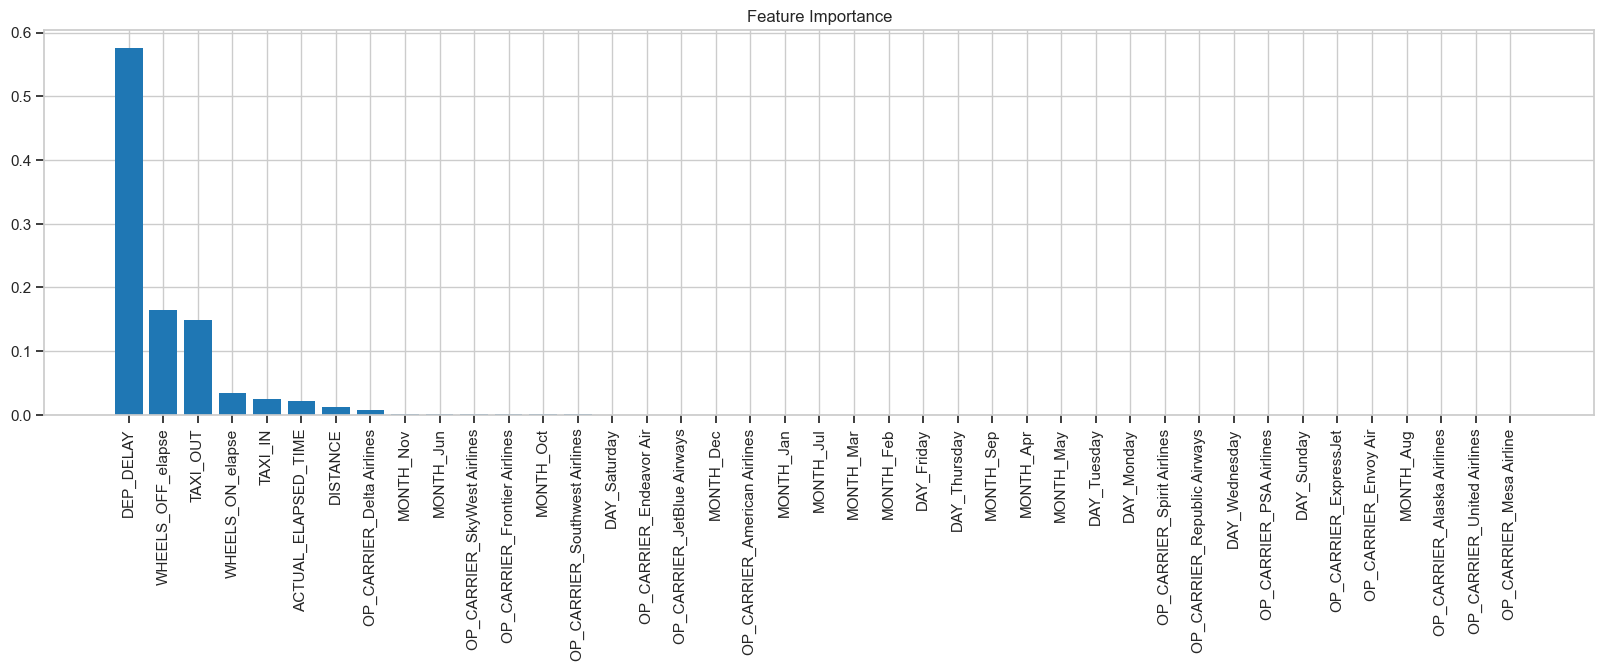

In [72]:
# Sorting in descending order and rearranging feature names to match sorted feature importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1] 
names = [X_train.columns[i] for i in indices]

# Bar chart creation
sns.set_context("notebook")
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)

plt.show()

In [73]:
features=pd.DataFrame(names)
scale = pd.DataFrame(importance[indices])
keep_features = pd.concat([features, scale],axis=1)
keep_features

,0,0
0,DEP_DELAY,0.575291
1,WHEELS_OFF_elapse,0.165084
2,TAXI_OUT,0.148950
3,WHEELS_ON_elapse,0.034030
4,TAXI_IN,0.024539
5,ACTUAL_ELAPSED_TIME,0.021385
6,DISTANCE,0.012292
7,OP_CARRIER_Delta Airlines,0.007526
8,MONTH_Nov,0.002124
9,MONTH_Jun,0.001831


### Classification Modelling

In [74]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score, 
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    confusion_matrix,
    precision_recall_curve
)

#### Base classifiers
- Decision Tree
- Random Forest

In [75]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384813 entries, 13 to 7213438
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DEP_DELAY                      384813 non-null  float64
 1   TAXI_OUT                       384813 non-null  float64
 2   TAXI_IN                        384813 non-null  float64
 3   ACTUAL_ELAPSED_TIME            384813 non-null  float64
 4   DISTANCE                       384813 non-null  float64
 5   WHEELS_OFF_elapse              384813 non-null  float64
 6   WHEELS_ON_elapse               384813 non-null  float64
 7   FLIGHT_STATUS                  384813 non-null  int64  
 8   OP_CARRIER_Alaska Airlines     384813 non-null  uint8  
 9   OP_CARRIER_American Airlines   384813 non-null  uint8  
 10  OP_CARRIER_Delta Airlines      384813 non-null  uint8  
 11  OP_CARRIER_Endeavor Air        384813 non-null  uint8  
 12  OP_CARRIER_Envoy Air        

In [76]:
flight_data_new["FLIGHT_STATUS"] = flight_data_new["FLIGHT_STATUS"].astype('category')

In [77]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384813 entries, 13 to 7213438
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DEP_DELAY                      384813 non-null  float64 
 1   TAXI_OUT                       384813 non-null  float64 
 2   TAXI_IN                        384813 non-null  float64 
 3   ACTUAL_ELAPSED_TIME            384813 non-null  float64 
 4   DISTANCE                       384813 non-null  float64 
 5   WHEELS_OFF_elapse              384813 non-null  float64 
 6   WHEELS_ON_elapse               384813 non-null  float64 
 7   FLIGHT_STATUS                  384813 non-null  category
 8   OP_CARRIER_Alaska Airlines     384813 non-null  uint8   
 9   OP_CARRIER_American Airlines   384813 non-null  uint8   
 10  OP_CARRIER_Delta Airlines      384813 non-null  uint8   
 11  OP_CARRIER_Endeavor Air        384813 non-null  uint8   
 12  OP_CARRIER_Env

In [78]:
flight_data_new.to_csv('flight_data_new.csv',index=False)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((307850, 41), (76963, 41))

#### Random Forest

In [80]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))

In [81]:
run_randomForests(X_train, X_test, y_train, y_test)

Test set
Roc-auc Random Forests roc-auc: 0.967824946807227

Accuracy Random Forest test: 0.8826449072931148

Precision Random Forest test: 0.9463941380640185

Recall Random Forest test: 0.2162686172556623

F-measure Random Forest test: 0.35208034433285507

Summary Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     65616
           1       0.95      0.22      0.35     11347

    accuracy                           0.88     76963
   macro avg       0.91      0.61      0.64     76963
weighted avg       0.89      0.88      0.85     76963



#### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:

def run_DT(X_train, X_test, y_train, y_test):
    DT = DecisionTreeClassifier(random_state=100)
    DT = DT.fit(X_train,y_train)

    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, DT.predict(X_test)))


In [87]:
run_DT(X_train, X_test, y_train, y_test)

Test set
Roc-auc Decision Tree roc-auc: 0.911810166784978

Accuracy Decision Tree: 0.9553291841534244

Precision Decision Tree: 0.8474040235438812

Recall Decision Tree: 0.8500925354719309

F-measure Decision Tree: 0.8487461504619446

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     65616
           1       0.85      0.85      0.85     11347

    accuracy                           0.96     76963
   macro avg       0.91      0.91      0.91     76963
weighted avg       0.96      0.96      0.96     76963



2023-12-11 21:32:49.090093: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
7697/7697 [==============================] - 110s 14ms/step - loss: 0.3194 - accuracy: 0.8861 - val_loss: 0.2062 - val_accuracy: 0.9347 - lr: 0.0010
Epoch 2/20
7697/7697 [==============================] - 110s 14ms/step - loss: 0.3197 - accuracy: 0.9063 - val_loss: 0.3263 - val_accuracy: 0.8939 - lr: 9.0484e-04
Epoch 3/20
7697/7697 [==============================] - 112s 15ms/step - loss: 0.2102 - accuracy: 0.9348 - val_loss: 0.2261 - val_accuracy: 0.9276 - lr: 8.1873e-04
Epoch 4/20
7697/7697 [==============================] - 115s 15ms/step - loss: 1.3171 - accuracy: 0.9306 - val_loss: 0.2360 - val_accuracy: 0.9317 - lr: 7.4082e-04
Epoch 5/20
7697/7697 [==============================] - 108s 14ms/step - loss: 0.2313 - accuracy: 0.9304 - val_loss: 0.1987 - val_accuracy: 0.9376 - lr: 6.7032e-04
Epoch 6/20
7697/7697 [==============================] - 111s 14ms/step - loss: 0.2030 - accuracy: 0.9365 - val_loss: 0.1958 - val_accuracy: 0.9378 - lr: 6.0653e-04
Epoch 7/20
7697/7697

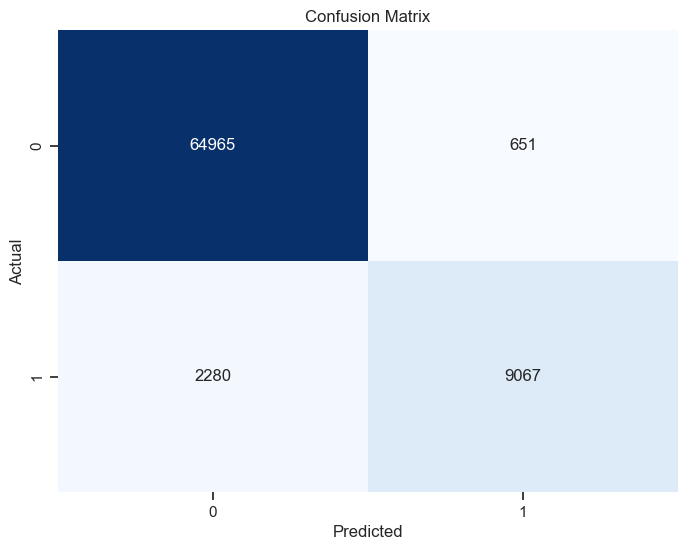

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     65616
           1       0.93      0.80      0.86     11347

    accuracy                           0.96     76963
   macro avg       0.95      0.89      0.92     76963
weighted avg       0.96      0.96      0.96     76963



In [102]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Extract target variable
y = flight_data_new['FLIGHT_STATUS']

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    y,
    test_size=0.2,
    random_state=100)

# Reshape the data
timesteps = X_train.shape[1] 
X_train = X_train.values.reshape(-1, timesteps, 1)
X_test = X_test.values.reshape(-1, timesteps, 1)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)

# Build the LSTM and Dropout
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(timesteps, 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a learning rate schedule
def lr_schedule(epoch):
    return 0.001 * np.exp(-epoch / 10)

# Use the learning rate schedule during training
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


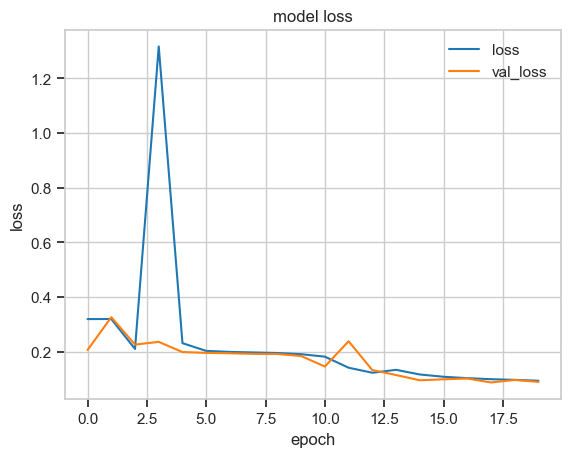

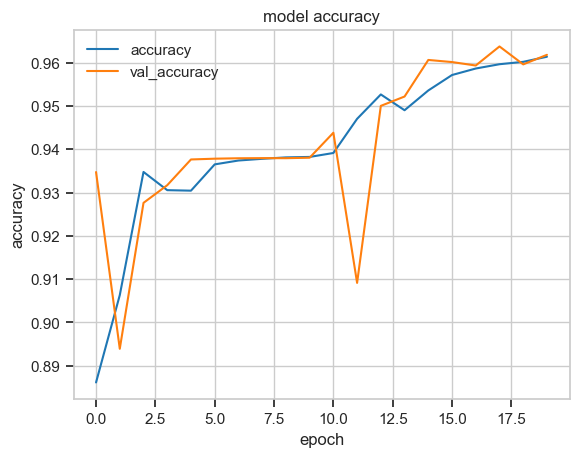

In [103]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()
accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

Epoch 1/20
8659/8659 [==============================] - 115s 13ms/step - loss: 0.3830 - accuracy: 0.8550 - val_loss: 0.3055 - val_accuracy: 0.9203 - lr: 0.0010
Epoch 2/20
8659/8659 [==============================] - 118s 14ms/step - loss: 0.1598 - accuracy: 0.9447 - val_loss: 0.1216 - val_accuracy: 0.9562 - lr: 9.0484e-04
Epoch 3/20
8659/8659 [==============================] - 121s 14ms/step - loss: 0.1330 - accuracy: 0.9531 - val_loss: 0.1257 - val_accuracy: 0.9552 - lr: 8.1873e-04
Epoch 4/20
8659/8659 [==============================] - 119s 14ms/step - loss: 0.1274 - accuracy: 0.9543 - val_loss: 0.1173 - val_accuracy: 0.9521 - lr: 7.4082e-04
Epoch 5/20
8659/8659 [==============================] - 113s 13ms/step - loss: 0.2157 - accuracy: 0.8973 - val_loss: 0.1167 - val_accuracy: 0.9546 - lr: 6.7032e-04
Epoch 6/20
8659/8659 [==============================] - 120s 14ms/step - loss: 0.1103 - accuracy: 0.9573 - val_loss: 0.0957 - val_accuracy: 0.9607 - lr: 6.0653e-04
Epoch 7/20
8659/8659

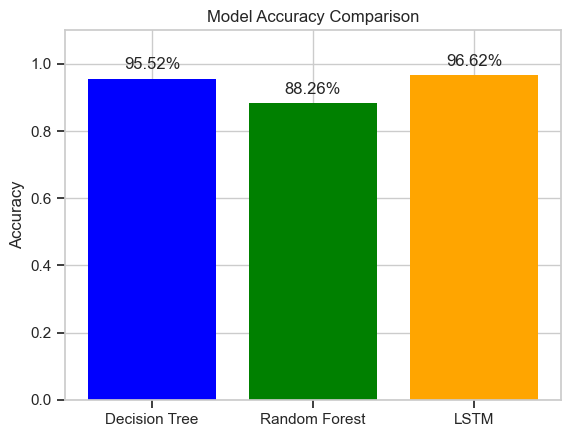

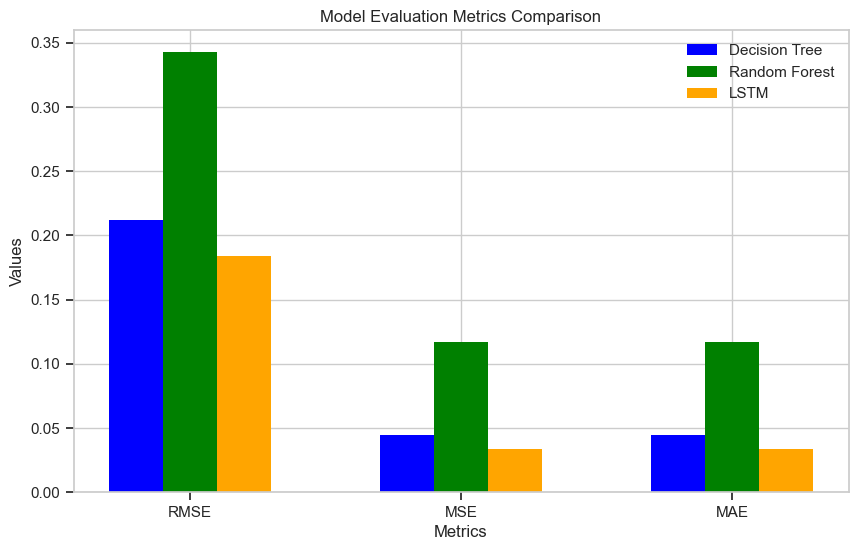

In [105]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mse, mae

def plot_accuracy_comparison(X_train, X_test, y_train, y_test):
    # Decision Tree
    DT = DecisionTreeClassifier(random_state=100)

    # Reshape 3D arrays to 2D arrays
    X_train_2d = X_train.reshape(X_train.shape[0], -1)
    X_test_2d = X_test.reshape(X_test.shape[0], -1)

    DT.fit(X_train_2d, y_train)
    dt_accuracy = accuracy_score(y_test, DT.predict(X_test_2d))
    y_pred_dt = DT.predict(X_test_2d)
    dt_rmse, dt_mse, dt_mae = calculate_metrics(y_test, y_pred_dt)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train_2d, y_train)
    rf_accuracy = accuracy_score(y_test, rf.predict(X_test_2d))
    y_pred_rf = rf.predict(X_test_2d)
    rf_rmse, rf_mse, rf_mae = calculate_metrics(y_test, y_pred_rf)

    # LSTM-based model
    timesteps = X_train.shape[1]

    X_train_lstm = X_train.reshape(-1, timesteps, 1)
    X_test_lstm = X_test.reshape(-1, timesteps, 1)

    scaler = MinMaxScaler()
    X_train_lstm = scaler.fit_transform(X_train_lstm.reshape(-1, 1)).reshape(X_train_lstm.shape)
    X_test_lstm = scaler.transform(X_test_lstm.reshape(-1, 1)).reshape(X_test_lstm.shape)

    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(timesteps, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def lr_schedule(epoch):
        return 0.001 * np.exp(-epoch / 10)

    lr_scheduler = LearningRateScheduler(lr_schedule)

    model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.1, callbacks=[lr_scheduler])
    
    _, lstm_accuracy = model.evaluate(X_test_lstm, y_test)

    y_pred_lstm_probs = model.predict(X_test_lstm).reshape(-1)
    y_pred_lstm = (y_pred_lstm_probs > 0.5).astype(int)
    lstm_rmse, lstm_mse, lstm_mae = calculate_metrics(y_test, y_pred_lstm)

    # Print additional metrics
    print('Decision Tree')
    print('RMSE:', dt_rmse)
    print('MSE:', dt_mse)
    print('MAE:', dt_mae)
    print()

    print('Random Forest')
    print('RMSE:', rf_rmse)
    print('MSE:', rf_mse)
    print('MAE:', rf_mae)
    print()

    print('LSTM')
    print('RMSE:', lstm_rmse)
    print('MSE:', lstm_mse)
    print('MAE:', lstm_mae)
    print()

    # Plotting
    models = ['Decision Tree', 'Random Forest', 'LSTM']
    accuracies = [dt_accuracy, rf_accuracy, lstm_accuracy]

    plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
    plt.ylim(0, 1.1)
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')

    # Adding percentage values above the bars
    for model, accuracy in zip(models, accuracies):
        plt.text(model, accuracy + 0.02, f'{accuracy*100:.2f}%', ha='center', va='bottom')

    # Plotting additional metrics
    metrics = ['RMSE', 'MSE', 'MAE']
    dt_metrics = [dt_rmse, dt_mse, dt_mae]
    rf_metrics = [rf_rmse, rf_mse, rf_mae]
    lstm_metrics = [lstm_rmse, lstm_mse, lstm_mae]

    width = 0.2  # the width of the bars
    x = np.arange(len(metrics))

    plt.figure(figsize=(10, 6))
    plt.bar(x - width, dt_metrics, width, label='Decision Tree', color='blue')
    plt.bar(x, rf_metrics, width, label='Random Forest', color='green')
    plt.bar(x + width, lstm_metrics, width, label='LSTM', color='orange')

    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title('Model Evaluation Metrics Comparison')
    plt.xticks(x, metrics)
    plt.legend()
    plt.show()

# Assuming you have X_train, X_test, y_train, y_test datasets
plot_accuracy_comparison(X_train, X_test, y_train, y_test)
